# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Concrete Compressive Strength Data Set (http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Concrete compressive strength(MPa, megapascals" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [1]:
# Importando as bibliotecas necessárias para importação dos datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")


In [10]:
# importando os dados  

In [2]:
df=pd.read_csv('Concrete_Data.csv')

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
y=df['Concrete compressive strength(MPa, megapascals) ']

In [5]:
X=df.drop('Concrete compressive strength(MPa, megapascals) ' ,axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)

In [7]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
875,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
660,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90
606,236.0,0.0,0.0,194.0,0.0,968.0,885.0,14
233,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,100
692,212.0,141.3,0.0,203.5,0.0,973.4,750.0,90
...,...,...,...,...,...,...,...,...
313,295.7,0.0,95.6,171.5,8.9,955.1,859.2,100
834,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28
419,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,14
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28


In [8]:
y_train

603     36.45
1012    61.24
335     38.77
670     43.38
370     26.05
        ...  
510     39.00
252     38.33
88      35.30
892     32.24
727     17.44
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64

In [9]:
y_test

875    18.28
660    31.02
606    12.84
233    53.90
692    39.70
       ...  
313    52.04
834    33.69
419    16.88
571    39.70
186    24.89
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [ ]:
#importando bibliotecas para construção da rede neural 

In [10]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

2023-04-23 10:17:48.178503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 10:17:50.576897: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-23 10:17:51.371330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-23 10:17:51.371362: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [ ]:
#construimos a rede neural

In [11]:
n_input = 8  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.01 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

2023-04-23 10:18:11.713172: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-23 10:18:11.725230: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-23 10:18:11.725289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gerson-550XDA): /proc/driver/nvidia/version does not exist
2023-04-23 10:18:11.726182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-traina

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [12]:
epochs = 3000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 10,
            epochs=epochs,
            verbose=0)

In [ ]:
#Avaliamos a performance do modelo )

In [15]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


23/23 [==============================] - 0s 784us/step


In [16]:
y_hat_test = model.predict(X_test)


10/10 [==============================] - 0s 1ms/step


In [ ]:
# métricas do treino

In [18]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [19]:
MAE_T,R2_T,RMSE_T

(3.9734347617774994, 0.90969222878261, 26.640636219970848)

In [20]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [21]:
MAE_t,R2_t,RMSE_t

(4.537076035163163, 0.8472210438653451, 36.81850190565996)

In [ ]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores de calcio real e predito no conjunto de teste 

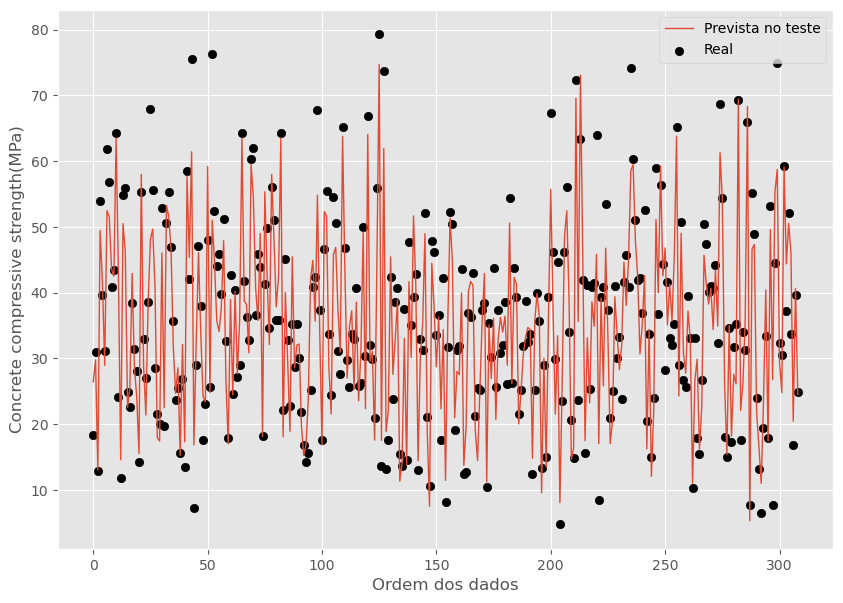

In [22]:
# avaliação conjunto de teste
n = 309
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [23]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [24]:
y_hat_mc.shape

(309, 1000)

In [ ]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [25]:
yhat=pd.DataFrame(y_hat_mc)

In [26]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,17.276033,28.264656,28.264656,26.226448,28.264656,28.517311,26.834728,28.646793,27.117193,25.181400,...,34.085045,28.264656,28.264656,28.264656,27.248432,28.264656,28.264656,28.264656,28.264656,21.418728
1,31.900948,20.907749,31.881718,34.490128,34.058872,31.881718,31.881718,31.881718,38.943268,31.430595,...,32.769791,31.881718,31.881718,31.881718,31.881718,31.881718,31.881718,21.433025,31.881718,31.881718
2,13.894001,14.397593,13.917326,13.894001,13.894001,13.894001,13.894001,12.914772,16.656082,13.894001,...,10.591585,13.894001,13.894001,13.894001,13.894001,14.796000,13.894001,12.987791,13.224789,13.894001
3,33.673214,19.770267,50.185879,22.253729,53.204193,51.112568,31.876476,21.921944,53.006748,18.044336,...,49.015087,50.185879,27.535244,53.006748,43.887844,53.006748,50.185879,50.581867,54.172409,53.312267
4,44.693066,44.693066,44.693066,44.693066,45.259647,41.566944,49.294598,47.205193,44.693066,17.319256,...,41.021038,47.205193,31.954273,44.693066,46.690071,44.693066,24.288622,44.693066,43.084522,22.988846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,51.640011,47.556286,53.452534,36.313000,54.171448,54.171448,51.906410,54.171448,54.171448,54.171448,...,54.171448,53.724628,51.906410,54.171448,54.171448,51.345757,54.171448,48.288902,53.503994,54.171448
305,50.751858,49.468533,49.468533,49.468533,44.502590,49.468533,49.468533,50.751858,49.468533,49.468533,...,49.468533,53.565308,49.468533,52.284492,49.468533,32.224243,44.502590,49.468533,49.468533,56.859573
306,21.869465,14.481689,20.808620,21.869465,16.294718,16.294718,21.869465,18.735134,19.598621,21.869465,...,21.169533,21.869465,21.869465,16.200861,21.869465,21.869465,20.220932,20.466673,18.624187,22.693155
307,43.537018,43.537018,26.046120,40.837627,43.537018,43.537018,43.537018,43.537018,43.537018,25.960802,...,43.537018,38.601513,41.677753,44.160954,43.537018,43.537018,43.537018,26.046120,43.537018,31.571507


In [ ]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [27]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [28]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,17.276033,28.264656,28.264656,26.226448,28.264656,28.517311,26.834728,28.646793,27.117193,25.181400,...,28.264656,28.264656,28.264656,27.248432,28.264656,28.264656,28.264656,28.264656,21.418728,27.685719
1,31.900948,20.907749,31.881718,34.490128,34.058872,31.881718,31.881718,31.881718,38.943268,31.430595,...,31.881718,31.881718,31.881718,31.881718,31.881718,31.881718,21.433025,31.881718,31.881718,31.000727
2,13.894001,14.397593,13.917326,13.894001,13.894001,13.894001,13.894001,12.914772,16.656082,13.894001,...,13.894001,13.894001,13.894001,13.894001,14.796000,13.894001,12.987791,13.224789,13.894001,14.418988
3,33.673214,19.770267,50.185879,22.253729,53.204193,51.112568,31.876476,21.921944,53.006748,18.044336,...,50.185879,27.535244,53.006748,43.887844,53.006748,50.185879,50.581867,54.172409,53.312267,49.053444
4,44.693066,44.693066,44.693066,44.693066,45.259647,41.566944,49.294598,47.205193,44.693066,17.319256,...,47.205193,31.954273,44.693066,46.690071,44.693066,24.288622,44.693066,43.084522,22.988846,41.930164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,51.640011,47.556286,53.452534,36.313000,54.171448,54.171448,51.906410,54.171448,54.171448,54.171448,...,53.724628,51.906410,54.171448,54.171448,51.345757,54.171448,48.288902,53.503994,54.171448,51.443180
305,50.751858,49.468533,49.468533,49.468533,44.502590,49.468533,49.468533,50.751858,49.468533,49.468533,...,53.565308,49.468533,52.284492,49.468533,32.224243,44.502590,49.468533,49.468533,56.859573,48.398243
306,21.869465,14.481689,20.808620,21.869465,16.294718,16.294718,21.869465,18.735134,19.598621,21.869465,...,21.869465,21.869465,16.200861,21.869465,21.869465,20.220932,20.466673,18.624187,22.693155,20.062258
307,43.537018,43.537018,26.046120,40.837627,43.537018,43.537018,43.537018,43.537018,43.537018,25.960802,...,38.601513,41.677753,44.160954,43.537018,43.537018,43.537018,26.046120,43.537018,31.571507,40.163898


In [ ]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [29]:
yhatd=yhat.iloc[:,0:1000]

In [30]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,17.276033,28.264656,28.264656,26.226448,28.264656,28.517311,26.834728,28.646793,27.117193,25.181400,...,34.085045,28.264656,28.264656,28.264656,27.248432,28.264656,28.264656,28.264656,28.264656,21.418728
1,31.900948,20.907749,31.881718,34.490128,34.058872,31.881718,31.881718,31.881718,38.943268,31.430595,...,32.769791,31.881718,31.881718,31.881718,31.881718,31.881718,31.881718,21.433025,31.881718,31.881718
2,13.894001,14.397593,13.917326,13.894001,13.894001,13.894001,13.894001,12.914772,16.656082,13.894001,...,10.591585,13.894001,13.894001,13.894001,13.894001,14.796000,13.894001,12.987791,13.224789,13.894001
3,33.673214,19.770267,50.185879,22.253729,53.204193,51.112568,31.876476,21.921944,53.006748,18.044336,...,49.015087,50.185879,27.535244,53.006748,43.887844,53.006748,50.185879,50.581867,54.172409,53.312267
4,44.693066,44.693066,44.693066,44.693066,45.259647,41.566944,49.294598,47.205193,44.693066,17.319256,...,41.021038,47.205193,31.954273,44.693066,46.690071,44.693066,24.288622,44.693066,43.084522,22.988846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,51.640011,47.556286,53.452534,36.313000,54.171448,54.171448,51.906410,54.171448,54.171448,54.171448,...,54.171448,53.724628,51.906410,54.171448,54.171448,51.345757,54.171448,48.288902,53.503994,54.171448
305,50.751858,49.468533,49.468533,49.468533,44.502590,49.468533,49.468533,50.751858,49.468533,49.468533,...,49.468533,53.565308,49.468533,52.284492,49.468533,32.224243,44.502590,49.468533,49.468533,56.859573
306,21.869465,14.481689,20.808620,21.869465,16.294718,16.294718,21.869465,18.735134,19.598621,21.869465,...,21.169533,21.869465,21.869465,16.200861,21.869465,21.869465,20.220932,20.466673,18.624187,22.693155
307,43.537018,43.537018,26.046120,40.837627,43.537018,43.537018,43.537018,43.537018,43.537018,25.960802,...,43.537018,38.601513,41.677753,44.160954,43.537018,43.537018,43.537018,26.046120,43.537018,31.571507


In [ ]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [71]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [72]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,std,2*std
0,17.276033,28.264656,28.264656,26.226448,28.264656,28.517311,26.834728,28.646793,27.117193,25.181400,...,28.264656,28.264656,27.248432,28.264656,28.264656,28.264656,28.264656,21.418728,4.478148,4.535551
1,31.900948,20.907749,31.881718,34.490128,34.058872,31.881718,31.881718,31.881718,38.943268,31.430595,...,31.881718,31.881718,31.881718,31.881718,31.881718,21.433025,31.881718,31.881718,5.546671,5.601929
2,13.894001,14.397593,13.917326,13.894001,13.894001,13.894001,13.894001,12.914772,16.656082,13.894001,...,13.894001,13.894001,13.894001,14.796000,13.894001,12.987791,13.224789,13.894001,2.137296,2.171180
3,33.673214,19.770267,50.185879,22.253729,53.204193,51.112568,31.876476,21.921944,53.006748,18.044336,...,27.535244,53.006748,43.887844,53.006748,50.185879,50.581867,54.172409,53.312267,8.483263,8.575352
4,44.693066,44.693066,44.693066,44.693066,45.259647,41.566944,49.294598,47.205193,44.693066,17.319256,...,31.954273,44.693066,46.690071,44.693066,24.288622,44.693066,43.084522,22.988846,7.044134,7.126366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,51.640011,47.556286,53.452534,36.313000,54.171448,54.171448,51.906410,54.171448,54.171448,54.171448,...,51.906410,54.171448,54.171448,51.345757,54.171448,48.288902,53.503994,54.171448,5.954311,6.122371
305,50.751858,49.468533,49.468533,49.468533,44.502590,49.468533,49.468533,50.751858,49.468533,49.468533,...,49.468533,52.284492,49.468533,32.224243,44.502590,49.468533,49.468533,56.859573,4.575421,4.778081
306,21.869465,14.481689,20.808620,21.869465,16.294718,16.294718,21.869465,18.735134,19.598621,21.869465,...,21.869465,16.200861,21.869465,21.869465,20.220932,20.466673,18.624187,22.693155,3.202928,3.245333
307,43.537018,43.537018,26.046120,40.837627,43.537018,43.537018,43.537018,43.537018,43.537018,25.960802,...,41.677753,44.160954,43.537018,43.537018,43.537018,26.046120,43.537018,31.571507,6.143797,6.234046


In [73]:
#Abaixo os valores reais para y do conjunto de teste

In [74]:
y_test=pd.DataFrame(y_test)

In [75]:
y_test

,"Concrete compressive strength(MPa, megapascals)"
0,18.28
1,31.02
2,12.84
3,53.90
4,39.70
...,...
304,52.04
305,33.69
306,16.88
307,39.70


In [77]:
#resetando o índice 

In [78]:
y_test=y_test.reset_index(drop=True)

In [79]:
y_test

,"Concrete compressive strength(MPa, megapascals)"
0,18.28
1,31.02
2,12.84
3,53.90
4,39.70
...,...
304,52.04
305,33.69
306,16.88
307,39.70


In [80]:
#retirado a coluna 0

In [81]:
mean=yhat.iloc[:,1000]

In [82]:
mean=pd.DataFrame(mean)

In [83]:
mean

,mean
0,27.685719
1,31.000727
2,14.418988
3,49.053444
4,41.930164
...,...
304,51.443180
305,48.398243
306,20.062258
307,40.163898


In [84]:
desvpad=yhatd.iloc[:,1000]

In [85]:
desvpad=2*pd.DataFrame(desvpad)

In [89]:
desvpad

,std
0,8.956295
1,11.093343
2,4.274593
3,16.966526
4,14.088267
...,...
304,11.908622
305,9.150842
306,6.405855
307,12.287595


In [ ]:
#colocar tudo em uma tabela

In [87]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

In [88]:
df.resume

,"Concrete compressive strength(MPa, megapascals)",mean,std
0,18.28,27.685719,8.956295
1,31.02,31.000727,11.093343
2,12.84,14.418988,4.274593
3,53.90,49.053444,16.966526
4,39.70,41.930164,14.088267
...,...,...,...
304,52.04,51.443180,11.908622
305,33.69,48.398243,9.150842
306,16.88,20.062258,6.405855
307,39.70,40.163898,12.287595


In [121]:
df.resume['Ulow']=df.resume['mean']-df.resume['std']

In [123]:
df.resume['Uup']=df.resume['mean'] + df.resume['std']

In [124]:
df.resume

,"Concrete compressive strength(MPa, megapascals)",mean,std,diff,Ulow,Uup
0,18.28,27.685719,8.956295,18.729424,18.729424,36.642014
1,31.02,31.000727,11.093343,19.907384,19.907384,42.094069
2,12.84,14.418988,4.274593,10.144395,10.144395,18.693581
3,53.90,49.053444,16.966526,32.086918,32.086918,66.019970
4,39.70,41.930164,14.088267,27.841897,27.841897,56.018432
...,...,...,...,...,...,...
304,52.04,51.443180,11.908622,39.534558,39.534558,63.351802
305,33.69,48.398243,9.150842,39.247401,39.247401,57.549085
306,16.88,20.062258,6.405855,13.656403,13.656403,26.468113
307,39.70,40.163898,12.287595,27.876304,27.876304,52.451493


In [136]:
    df.resume.rename(columns={'Concrete compressive strength(MPa, megapascals) ':'y_real'},inplace=True)  

In [137]:
df.resume

,y_real,mean,std,diff,Ulow,Uup
0,18.28,27.685719,8.956295,18.729424,18.729424,36.642014
1,31.02,31.000727,11.093343,19.907384,19.907384,42.094069
2,12.84,14.418988,4.274593,10.144395,10.144395,18.693581
3,53.90,49.053444,16.966526,32.086918,32.086918,66.019970
4,39.70,41.930164,14.088267,27.841897,27.841897,56.018432
...,...,...,...,...,...,...
304,52.04,51.443180,11.908622,39.534558,39.534558,63.351802
305,33.69,48.398243,9.150842,39.247401,39.247401,57.549085
306,16.88,20.062258,6.405855,13.656403,13.656403,26.468113
307,39.70,40.163898,12.287595,27.876304,27.876304,52.451493


In [141]:
df.resume['status']=""

In [142]:
df.resume

,y_real,mean,std,diff,Ulow,Uup,status
0,18.28,27.685719,8.956295,18.729424,18.729424,36.642014,
1,31.02,31.000727,11.093343,19.907384,19.907384,42.094069,
2,12.84,14.418988,4.274593,10.144395,10.144395,18.693581,
3,53.90,49.053444,16.966526,32.086918,32.086918,66.019970,
4,39.70,41.930164,14.088267,27.841897,27.841897,56.018432,
...,...,...,...,...,...,...,...
304,52.04,51.443180,11.908622,39.534558,39.534558,63.351802,
305,33.69,48.398243,9.150842,39.247401,39.247401,57.549085,
306,16.88,20.062258,6.405855,13.656403,13.656403,26.468113,
307,39.70,40.163898,12.287595,27.876304,27.876304,52.451493,


In [143]:
df.resume.to_csv('df.resume.csv')

In [ ]:
#verificar um valor predito : média e desvio padrão 

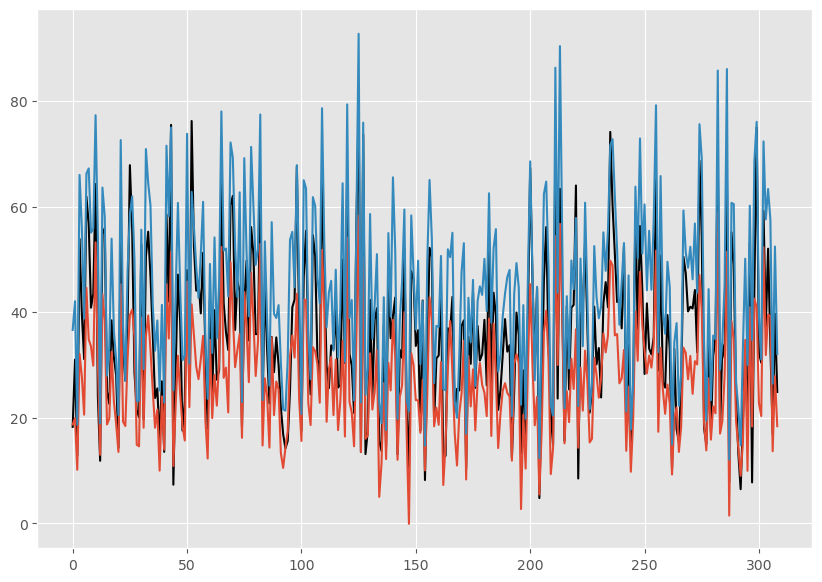

In [139]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(df.resume['y_real'],color='black')
plt.plot(df.resume['Ulow'])
plt.plot(df.resume['Uup'])






plt.show()

In [ ]:
yt=np.array(y_test)

In [ ]:
yt[0]

In [ ]:
np.mean(y_hat_mc[0])

In [ ]:
np.sqrt(np.var(y_hat_mc[0]))

In [ ]:
#Computamos média e variância para cada ponto no set de teste.

In [144]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [145]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

4.417219122852709

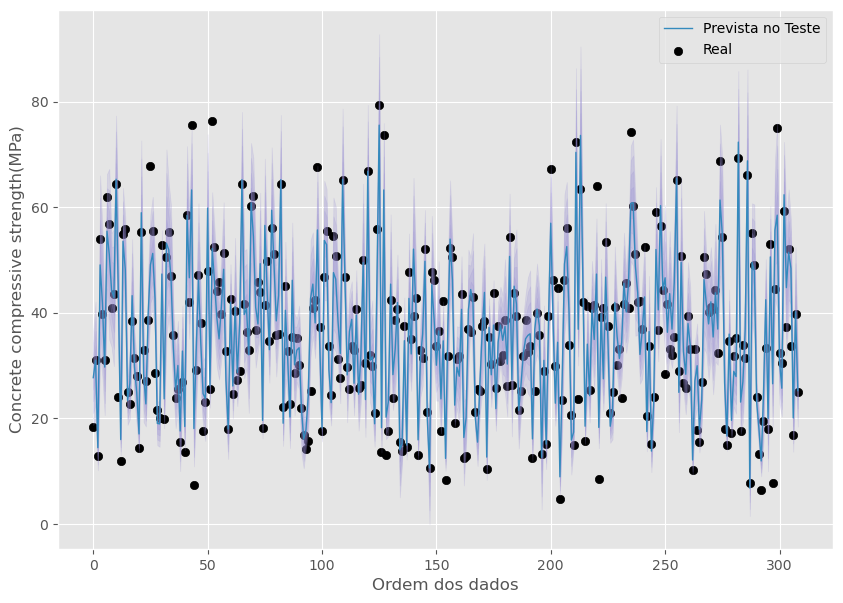

In [146]:
n = 309
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [147]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

/home/gerson/anaconda3/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [148]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

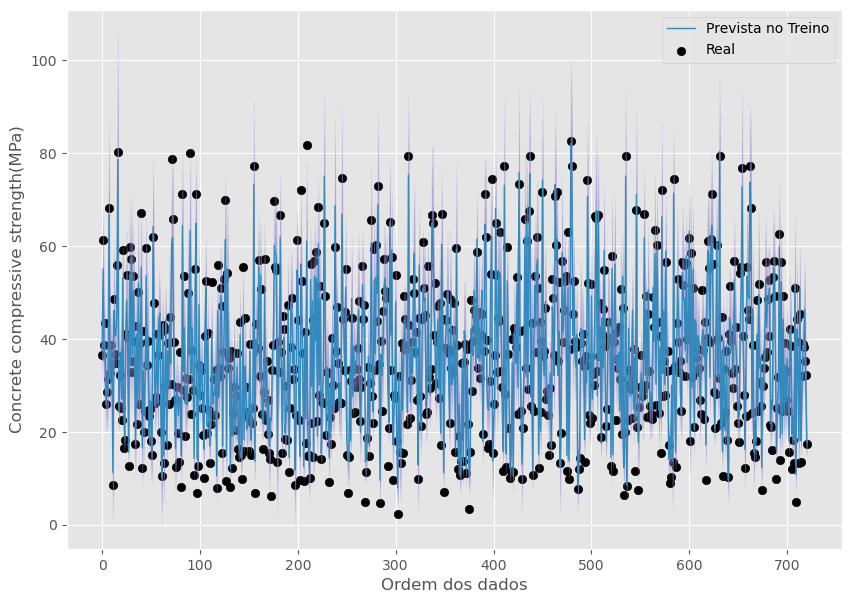

In [149]:
n = 721
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Concrete compressive strength(MPa)")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()